# Demarche de travail

**Definir un objectif mesurable**
  - Objectif : Predire si une personne est infectée en fonction des données cliniques disponibles
  - Metrique : 
    - (Accuracy -> 90%)
    - Precision
    - Recall(sensibilité) -> 70%
    - Score F1 -> 50%

**EDA(Exploratory Data Analysis)**
  - Objectif: Se mettre à l'aise avec notre dataset, comprendre au maximum nos variables et ensuite définir une stratégie de modelisation

**Pre-processing**
- Objectif : Transformer notre dataset pour le mettre dans le format qui va etre propice au developpement de machine learning
    - Transformer :
        
         Encodage = labelEncoder, OnehotEncoder
         Normalisation = MinMaxScaler, StandarsScaler, PolynomialFeature
         Imputation = SimpleImputer (whith strategie('mean', 'constant')), KNNimputer, MissingIndicator
         Selection 
         Extraction 
   

**Modelling**

  - Objectif : Creer un model de machine learning de l'entrainer, de l'evaluer et de l'ameliorer

**Checklist de base (non-exhaustive )**

**Analyse de la forme**

- Identification de la target
- Nombre de lignes et de colonnes
- Types de variables
- Identification des valeurs manquantes

**Analyse du fond**
  - visualisation de la target(Histogramme/Boxplot)
  - Comprehension des différentes variables(Internet)
  - Visualisation des relations features-target(Histogramme/Boxplot)
  - Identification des outliers


**Pre-processing**  

  - Création du Train set/ Test set
  - Elimination des NaN : dropna(), imputation, colonnes vides
  - Encodage
  - Suppression des outliers nefastes au modèle
  - Feature Selection
  - Feature Engineering(si possible en connaisant  bien le domaine sur lequel on travail)
  - Feature Scaling (Normalisation)

**Modelling**

  - Définir une fonction d'évaluation
  - Entrainement de différents modèles
  - Optimisation avec GridSearchCV
  - (Optionnel) Analyse des erreurs et retour au Preprocessing/EDA
  - Learning Curve et prise de décision


- Remarque: 
      
    Création de grande liste de model d'évaluation pour tester sur differente model et voir les plus performant et les retenir et les donner à un gridsearhCV pour optimiser les hyperparametres 


In [5]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline


**EDA(Exploratory Data Analysis)**

**Analyse de forme**

In [6]:
pd.set_option('display.max_row', 16)
pd.set_option('display.max_column', 16)

In [7]:
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df = data.copy()

**Target variable**
  - TenYearCHD :     
      Risque de maladie coronarienne (CHD) sur 10 ans - (binaire : « 1 », signifie « Oui », « 0 » signifie « Non »)


In [9]:
df.shape # Nombre de lignes et de colonnes

(4238, 16)

In [10]:
df.dtypes # types de variables

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [11]:
df.dtypes.value_counts()

float64    9
int64      7
dtype: int64

**Analyser les valeurs manquantes et visualiser dans une image:**
  - Observation :      
      On peut voir qu'on a pas beaucoups de valeur manquantes dans ce dataset
      (valeurs nulles ou manquantes en blanc) 

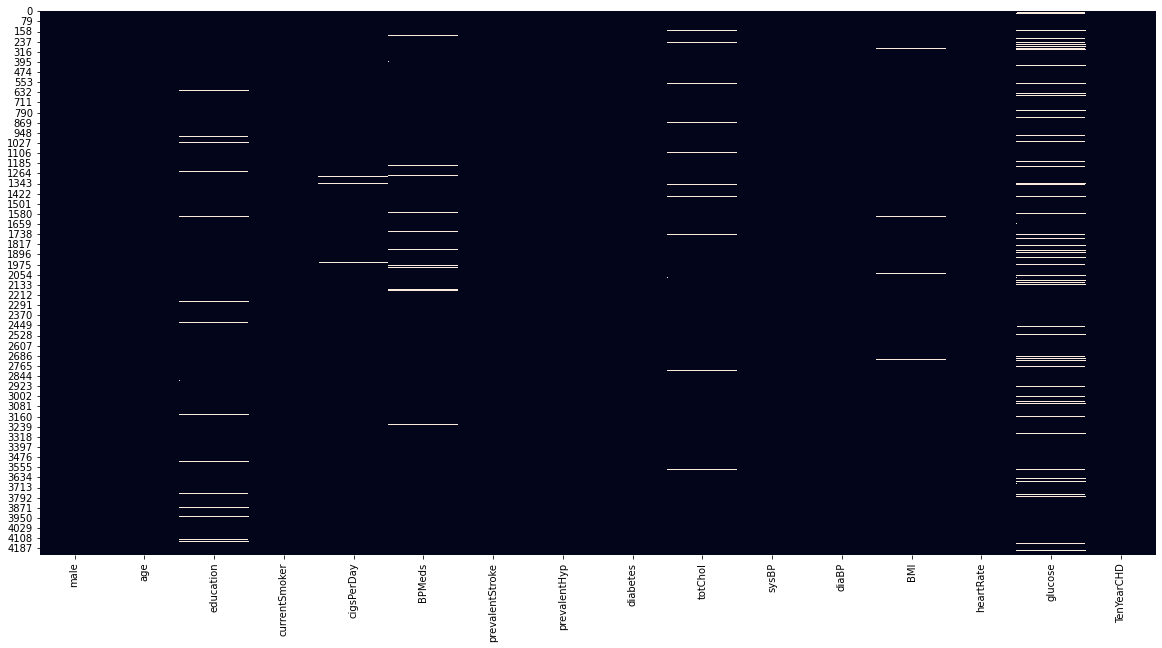

In [12]:
# Analyser les valeurs manquantes et visualiser dans une image:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

**Mesurer le % de valeurs manquantes dans l'ordre croissant**

  - Observation :     
      - D'après cette analyse on a pu voir qu'on a pas beaucoup de NaN 
      - Et y'a 5 types de données (démographique, comportementale, éducation, antécédant medical, information medical actuel) 

    - Tot Chol : taux de cholestérol total (Continu)
    - Sys BP : tension artérielle systolique (continue)
    - Dia BP : tension artérielle diastolique (continue)
    - IMC : Indice de Masse Corporelle (Continu)
    - Fréquence cardiaque : fréquence cardiaque (Continue - Dans la recherche médicale, des variables telles que la fréquence cardiaque, bien qu'en fait discrètes, sont néanmoins considérées comme continues en raison du grand nombre de valeurs possibles.)
    - Glucose : niveau de glucose (continu)

    - Fumeur actuel : si le patient est un fumeur actuel ou non (Nominal)
    - Cigs Per Day : le nombre de cigarettes que la personne a fumées en moyenne en une journée (peut être considéré comme continu car on peut avoir n'importe quel nombre de cigarettes, même une demi-cigarette).

    - Sexe : masculin ou féminin (nominal)
    - Âge : Âge du patient ; (Continu - Bien que les âges enregistrés aient été tronqués à des nombres entiers, le concept d'âge est continu)

In [13]:
# Mesurer le % de valeurs manquantes dans l'ordre croissant:
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=True)

male               0.000000
age                0.000000
currentSmoker      0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
heartRate          0.023596
BMI                0.448325
cigsPerDay         0.684285
totChol            1.179802
BPMeds             1.250590
education          2.477584
glucose            9.155262
dtype: float64

In [14]:
pourcentage_var_null = ((df.isna().sum()).sum()/df.shape[0])*100
print(f'Le pourcentage de données manquantes est de {round(pourcentage_var_null,2)}%')

Le pourcentage de données manquantes est de 15.22%


In [15]:
total = df.isna().sum().sort_values(ascending=False)
pr_var_null = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100

missing = pd.concat([total, pr_var_null], axis=1, keys=["Total", "Pourcentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Pourcentage
glucose,388,9.155262
education,105,2.477584
BPMeds,53,1.250590
totChol,50,1.179802
cigsPerDay,29,0.684285
BMI,19,0.448325
heartRate,1,0.023596


**Analyse de fond**

  - Observation :           
      - On peut voir que la colonne glucose contient beaucoup de valeur null par rapport aux autres colonnes mais cette colonne pourra nous service sur notre travail à venir donc on a pas besoin de l'eliminer.
      - Par contre la colonne education ne nous servira pas sur notre travail a venir d'où on va l'éliminer

  - Ananlyse du target variable :    
      D'après notre target variable on voit que à peu près 15% de personnes qui ont des risque de maladies coronarienne.
      De ce fait on va utiliser des score comme (F1, recall et precision)

  - Histogrammes des variables continues :    
    - On peut voir que la majorité des courbes sont centrées et qu'elles ont l'air d'avoir un écartype = 1, d'où ces données sont standardisés.
    - On peut aussi voir que pas mal de ces données suivent une distribution normale mais pas toute(distribution asymétrique)

  - Histogrammes des variables nominales :      
      Les données sur la prévalence des AVC, du diabète et des médicaments pour la tension artérielle sont mal équilibrées
  
  - Visualisation relation target/age :    
      Les personnes les plus à risque de développer une maladie coronarienne ont entre 51 et 63 ans, c'est-à-dire les barres bleues


In [16]:
## Ici on va eliminer la colonne educatui qui nous sert pas à grand chose pour notre travail
df = df.drop('education', axis=1)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


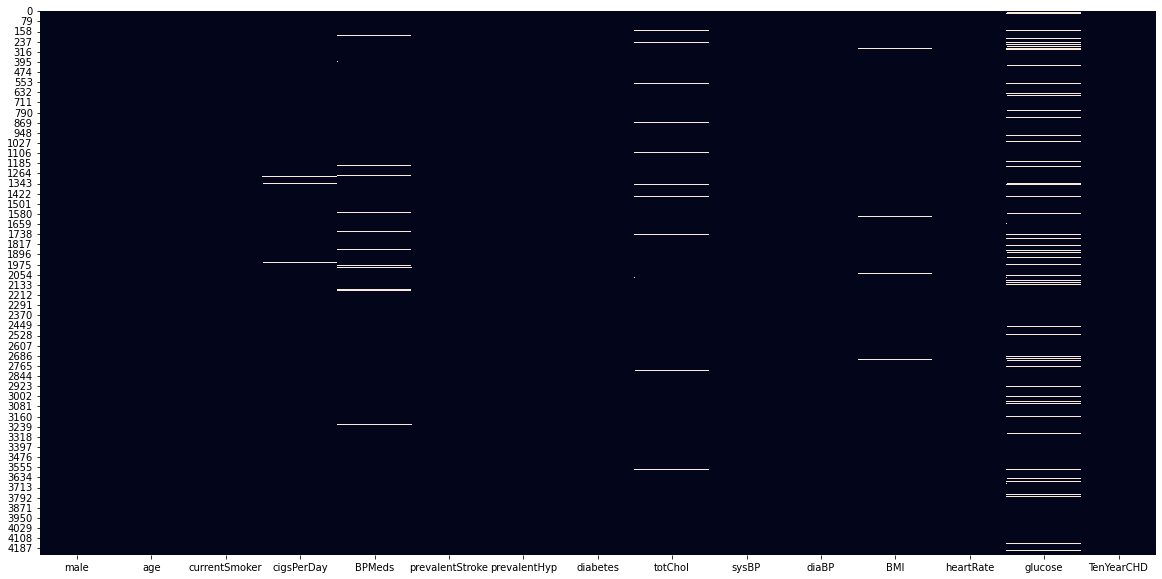

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [18]:
df['TenYearCHD'].value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

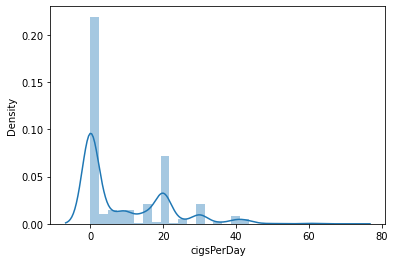

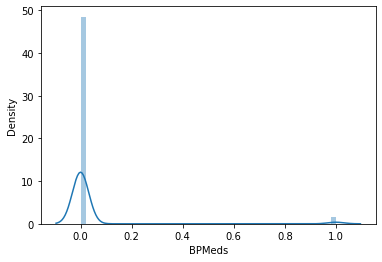

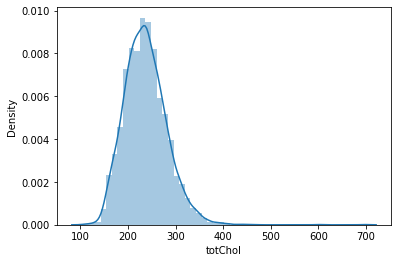

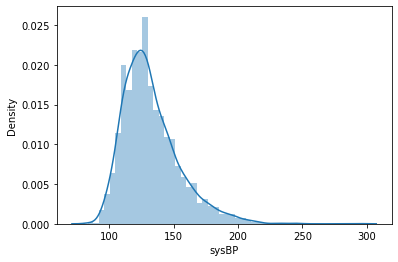

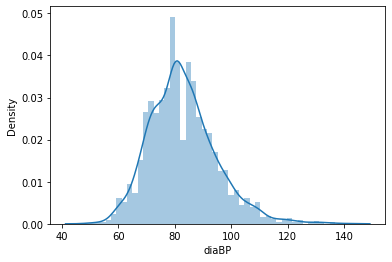

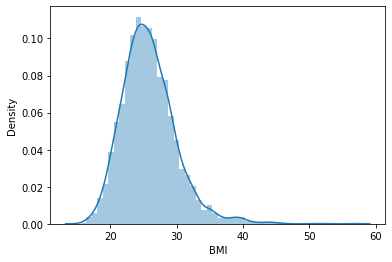

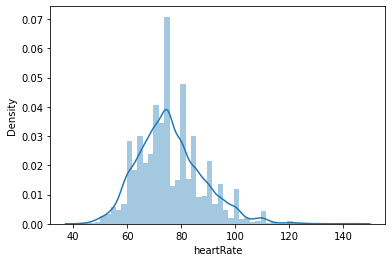

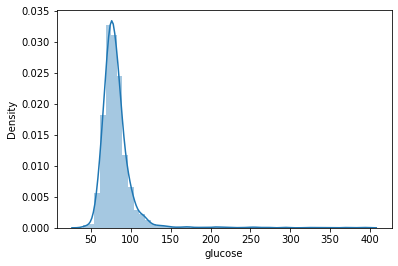

In [19]:
for col in df.select_dtypes('float') :
  plt.figure()
  sns.distplot(df[col])

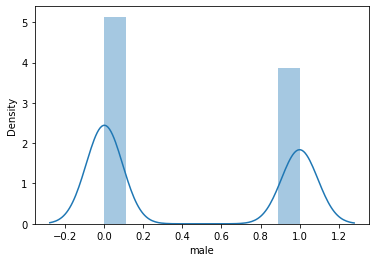

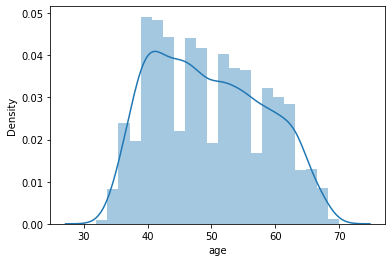

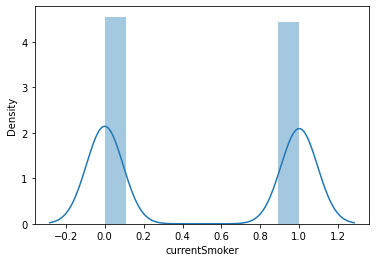

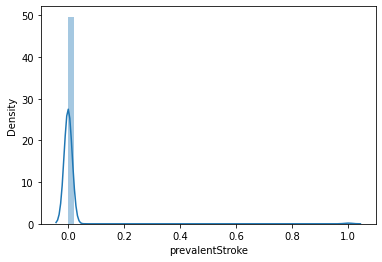

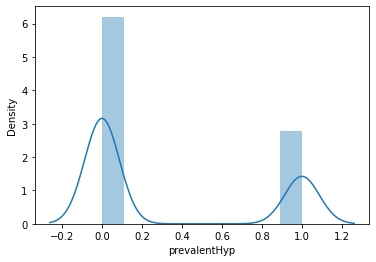

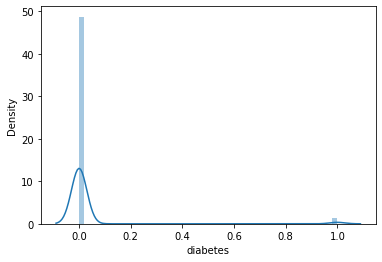

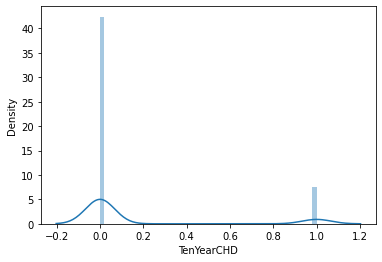

In [20]:
for col in df.select_dtypes('int') :
  plt.figure()
  sns.distplot(df[col])

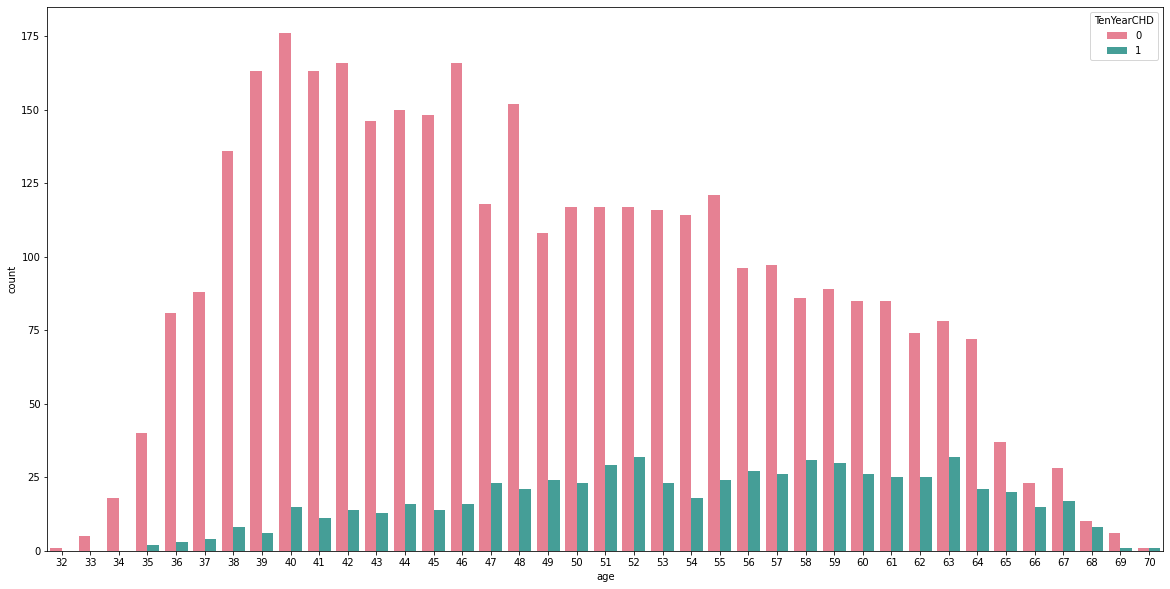

In [21]:
# Visualisation de la relation target / age
plt.figure(figsize=(20, 10))
sns.countplot(x='age', hue= 'TenYearCHD', data=df, palette='husl')


**Analyse détaillé**

   - Un peu plus d'hommes souffrent de coronaropathie que de femmes
   - Les risques de développer une maladie coronarienne sont plus élevés chez les patients hypertendus et diabétiques et sont presque similaires entre les fumeurs et les non-fumeurs

   - Correlation Heat map:  
        - Il n'y a pas de caractéristiques avec une corrélation supérieure à 0,5 avec le risque à dix ans de développer une maladie coronarienne, ce qui montre que les caractéristiques sont de mauvais prédicteurs.

        - Il existe également quelques fonctionnalités fortement corrélées les unes aux autres et cela n'a aucun sens de les utiliser toutes les deux pour créer un modèle d'apprentissage automatique. Ceux-ci inclus : Glycémie et diabète (évidemment) ; pressions artérielles systolique et diastolique; le tabagisme et le nombre de cigarettes fumées par jour. Par conséquent, nous devons effectuer une sélection de fonctionnalités pour choisir les meilleures fonctionnalités

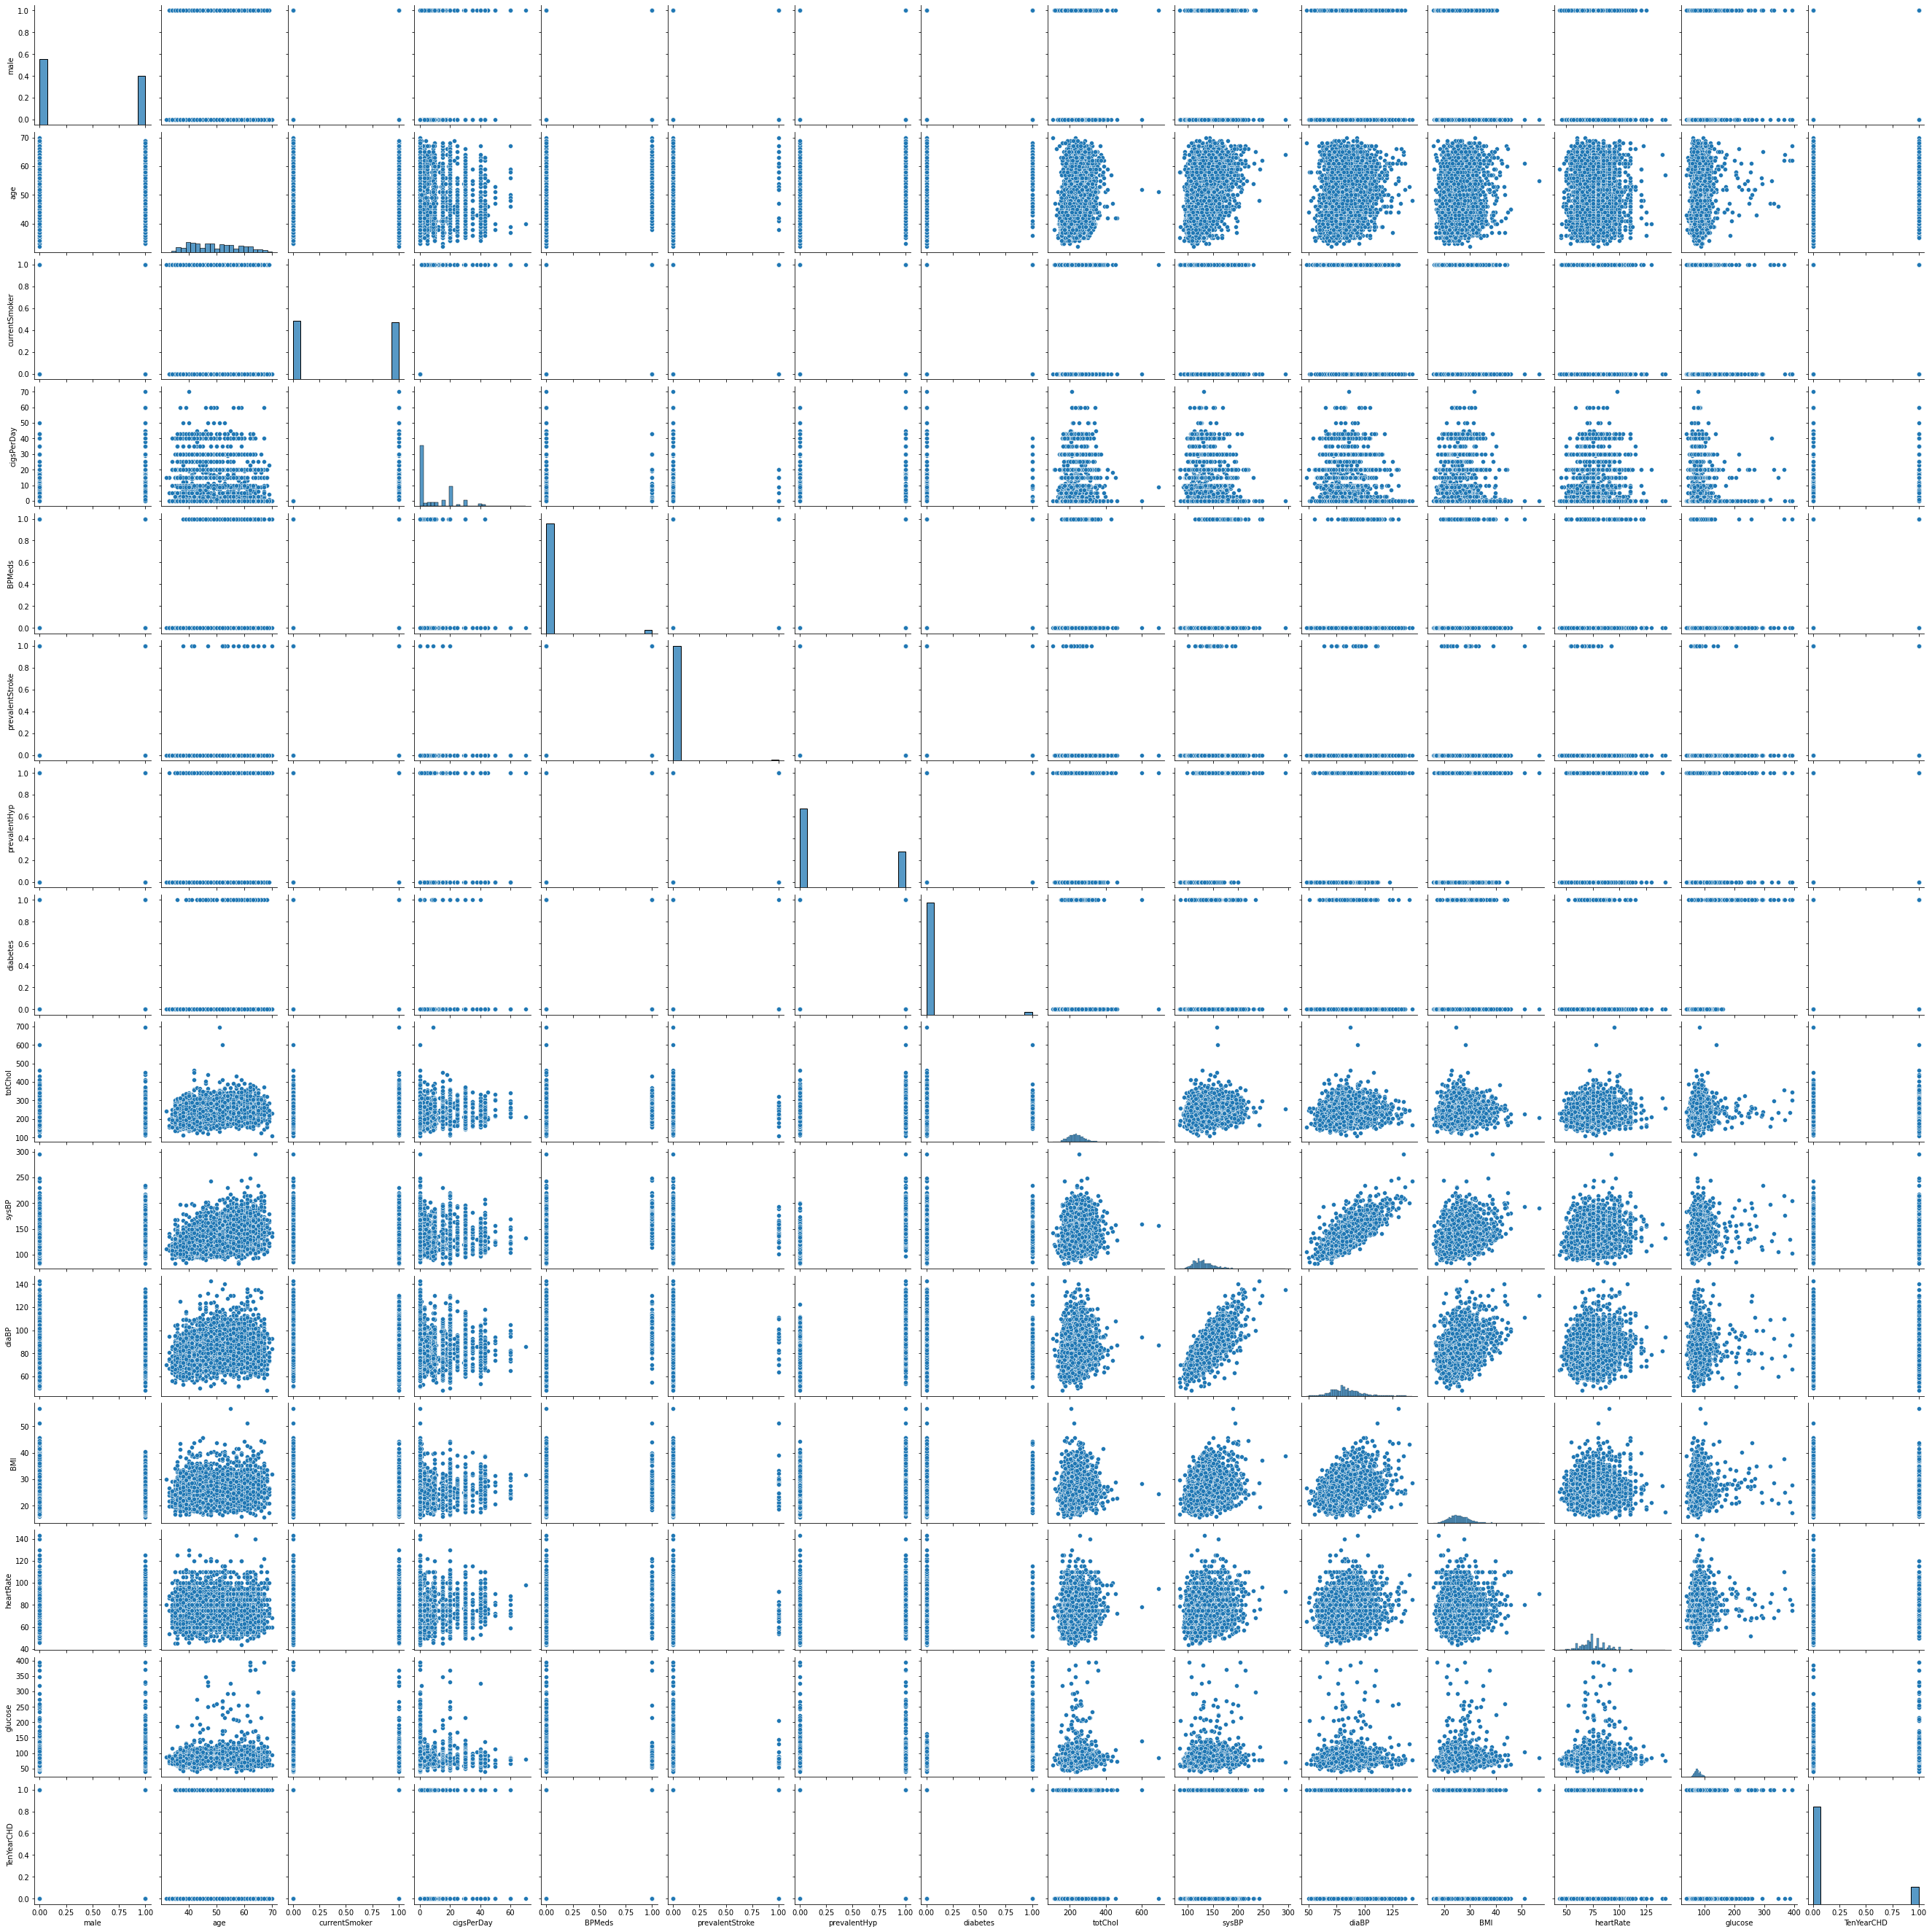

In [22]:
# Relation variable/variable
sns.pairplot(df)

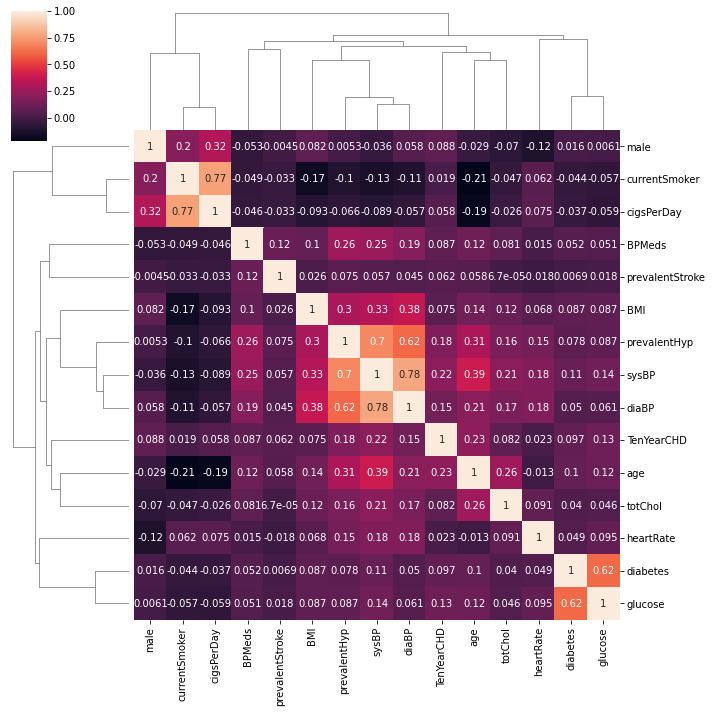

In [23]:
# Correlation Heat map
sns.clustermap(df.corr(), annot=True)

**Pre processing**

Pour cette partie, nous avons décider d'utiliser une approche très simple et tres efficace pour faire le pré processing de notre dataset.
A savoir que dans notre checklist on a bien detaillé la demarche qu'on avait opté mais par manque de temps, nous avons decidé de la changer
et utilisé cette approche qu'on a eu après quelques recherche et l'aide des cours :

Cette demarche consiste a mettre de coté  toutes les operations un peu avancées comme ce qu'on a mis dans notre <demarche de travail>
Et se concentrer uniquement sur le strict minimum a savoir :

  - Creer un Trainset/Testset
  - Encoder nos variables
  - Nettoyer les valeurs manquantes

Ensuite avant meme de commencer a faire de la selection de variable ou de la normalisation etc On va creer un 1er model de ML(Evaluation et diagnostique).
Pour ensuite tenter d'ameliorer la performence de notre model avec les differentes operation de preprocessing mentionner en Haut.


- Imputation :           
    Ici nous avons opté pour l'imputation avec KNNImputer pour changer les valeurs NaN avec celle de leur voisin proche

In [833]:
df = data.copy()

In [834]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [835]:
#imputation 
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [836]:
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [837]:
def imputation(df):
 
  imputer = KNNImputer(n_neighbors=5)
  df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
  return df
imputation(df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.2,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,76.8,0.0


In [838]:
df=imputation(df)

In [839]:
#feature selection
from sklearn.feature_selection import  SelectKBest
from sklearn.feature_selection import chi2

In [840]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [841]:
best_features = SelectKBest(score_func=chi2, k=10)
df_topFeature = best_features.fit(X, y)
df_topFeature_score = pd.DataFrame(df_topFeature.scores_)
df_topFeature_colonnes = pd.DataFrame(X.columns)

In [842]:
top_features = pd.concat([df_topFeature_colonnes, df_topFeature_score], axis=1)
top_features.columns = ['Features', 'Scores']
print(top_features.nlargest(14, 'Scores'))

           Features      Scores
10            sysBP  728.292522
14          glucose  415.598196
1               age  318.597444
9           totChol  236.228740
4        cigsPerDay  222.830065
11            diaBP  153.090954
7      prevalentHyp   92.167857
8          diabetes   39.103710
5            BPMeds   32.730383
0              male   18.915212
6   prevalentStroke   16.095638
12              BMI   15.608696
2         education    6.250642
13        heartRate    4.311274


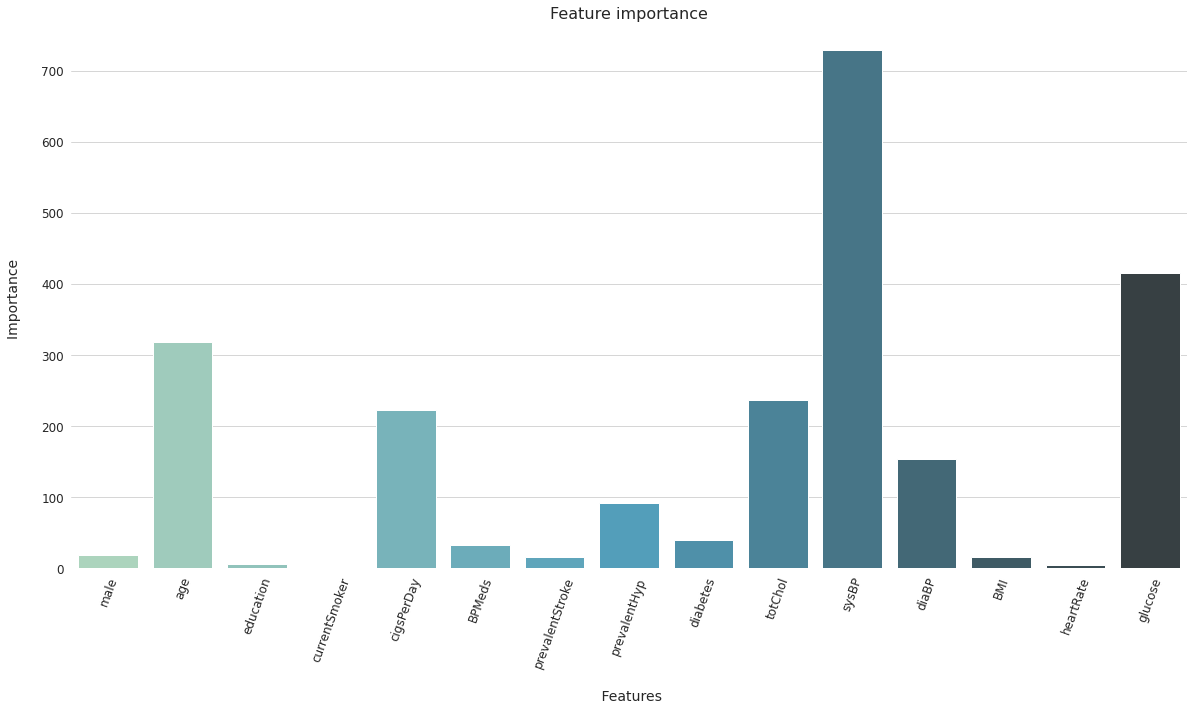

In [843]:
plt.figure(figsize=(20,10))
sns.barplot(x='Features', y='Scores', data=top_features, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.xticks(rotation=70)
plt.yticks(fontsize=12)
plt.show()

In [844]:
top_features = top_features.sort_values(by='Scores', ascending=False)

In [845]:
top_features = list(top_features['Features'])[:10]

In [846]:
top_features.append('TenYearCHD')
top_features

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'TenYearCHD']

In [847]:
df_topFeature = df[top_features]

In [848]:
df_topFeature.head(1000)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39.0,195.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0
1,121.0,76.0,46.0,250.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0
2,127.5,70.0,48.0,245.0,20.0,80.0,0.0,0.0,0.0,1.0,0.0
3,150.0,103.0,61.0,225.0,30.0,95.0,1.0,0.0,0.0,0.0,1.0
4,130.0,85.0,46.0,285.0,23.0,84.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,122.0,90.2,47.0,201.0,9.0,67.0,0.0,0.0,0.0,1.0,0.0
996,107.5,68.0,49.0,199.0,30.0,71.0,0.0,0.0,0.0,1.0,0.0
997,125.0,81.0,55.0,255.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0
998,122.0,81.0,57.0,372.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0


In [849]:
# Train Test
from sklearn.model_selection import train_test_split

In [850]:
trainset, testset = train_test_split(df_topFeature, test_size=0.3, random_state=0)

In [851]:
trainset['TenYearCHD'].value_counts()

0.0    2520
1.0     446
Name: TenYearCHD, dtype: int64

In [852]:
testset['TenYearCHD'].value_counts()

0.0    1074
1.0     198
Name: TenYearCHD, dtype: int64

In [853]:
def preprocessing(df_topFeature):

  df_topFeature = imputation(df_topFeature)
  X = df_topFeature.drop('TenYearCHD', axis=1)
  y = df_topFeature['TenYearCHD']

  print(y.value_counts())
 
  return X, y


In [854]:
X_train, y_train = preprocessing(trainset)

0.0    2520
1.0     446
Name: TenYearCHD, dtype: int64


In [855]:
X_test, y_test = preprocessing(testset)

0.0    1074
1.0     198
Name: TenYearCHD, dtype: int64


In [856]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [857]:
model = DecisionTreeClassifier(criterion='gini',class_weight='balanced')

In [858]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import  learning_curve

In [859]:
def evaluation(model) :
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

In [860]:
evaluation(model)

[[925 149]
 [155  43]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1074
         1.0       0.22      0.22      0.22       198

    accuracy                           0.76      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.76      0.76      0.76      1272



In [861]:
def evaluation(model) :
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  N,train_score, val_score = learning_curve(model, X_train, y_train, 
                                            cv=4, scoring ='f1',
                                            train_sizes=np.linspace(0.1,1,10))
  
  plt.figure(figsize=(12,8))
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='val score')
  plt.legend()

**Diagnostique du graphe**

 En diagnostiquant notre model on voit qu'il est en overfiting parceque que le model a un score de
        100% sur les données du trainset.
        Par contre il est incapable de generaliser sur de nouveau cas, car avec les données du validation_set
        On obtient une performance f1 beaucoup moins bonne ce qui nous indique que ce model est en overfiting.

  Pour eviter l'overfiting on peut commencer par donner a notre ML plus de données
        car plus on a donnée plus le score sur validation_set augmente

[[935 139]
 [157  41]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1074
         1.0       0.23      0.21      0.22       198

    accuracy                           0.77      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.76      0.77      0.76      1272



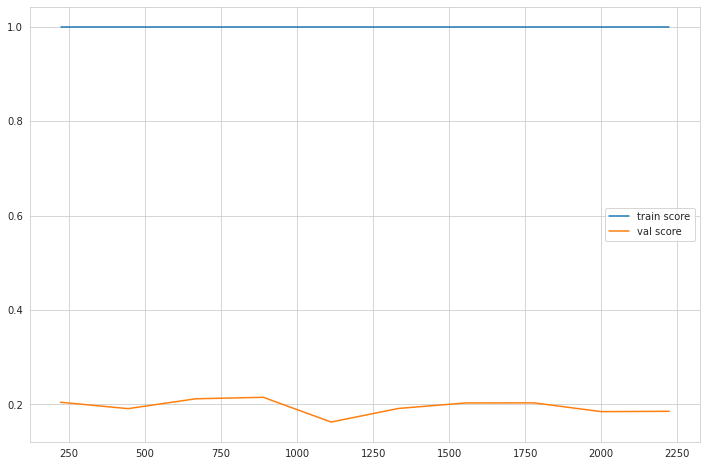

In [862]:
evaluation(model)

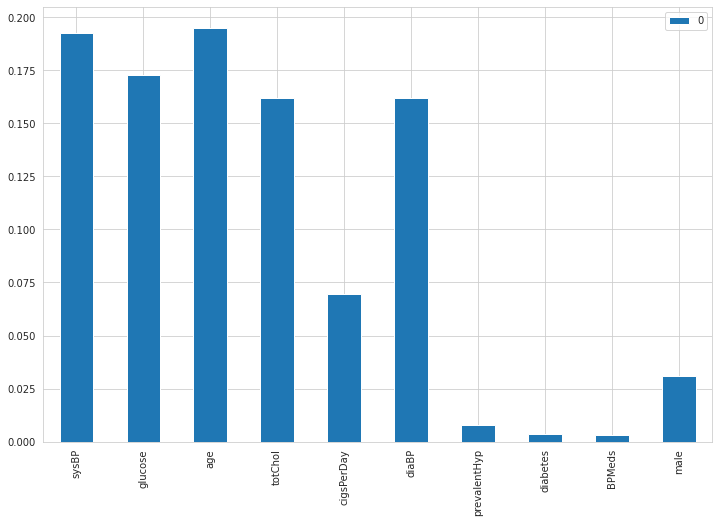

In [863]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

**Modelling**

D'après nos different resultat nous constatons que le Model logistique à l'aide d'un GridSearchCV represente des resultat vraiment interessant.

On a utlisé un RandomizedSearchCv qui nous bien amérioler notre model sur le recall d'où nous avons presque atteint notre objectif(70%) de base sur le recall cependant sur notre f1_score il y'a une très grande différence avec notre objectif(50%)


**recall = 68 %**    
**f1_score = 40 %**

In [864]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


In [865]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve


In [866]:
hyper_param = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}

In [867]:
grid = GridSearchCV(LogisticRegression(), hyper_param, cv=4)
grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'C': 1, 'class_weight': None, 'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92      1074
         1.0       0.68      0.08      0.14       198

    accuracy                           0.85      1272
   macro avg       0.77      0.53      0.53      1272
weighted avg       0.83      0.85      0.80      1272



In [868]:
confusion_matrix(y_test,y_pred)

array([[1067,    7],
       [ 183,   15]])

In [869]:
log_accuracy = accuracy_score(y_test, y_pred)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 85.06%


In [870]:
logistic_f1 = f1_score(y_test, y_pred)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 13.64%


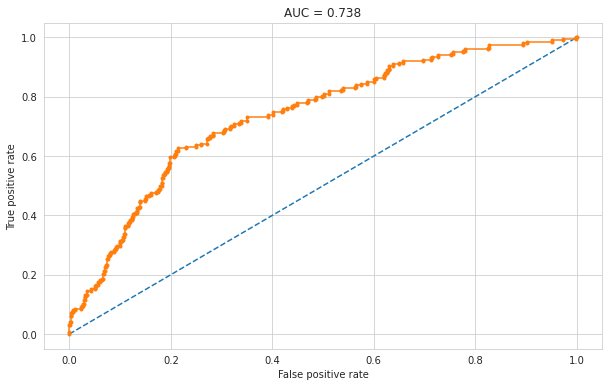

In [871]:
# ROC curve and AUC 
probs = grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()


In [872]:
grid = RandomizedSearchCV(LogisticRegression(), hyper_param, scoring='recall' ,cv=4,
                          n_iter=40)
grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'penalty': 'l2', 'class_weight': 'balanced', 'C': 1}
              precision    recall  f1-score   support

         0.0       0.93      0.68      0.78      1074
         1.0       0.29      0.70      0.41       198

    accuracy                           0.68      1272
   macro avg       0.61      0.69      0.60      1272
weighted avg       0.83      0.68      0.73      1272



In [873]:
confusion_matrix(y_test,y_pred)

array([[730, 344],
       [ 59, 139]])

In [874]:
log_accuracy = accuracy_score(y_test, y_pred)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 68.32%


In [875]:
logistic_f1 = f1_score(y_test, y_pred)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 40.82%


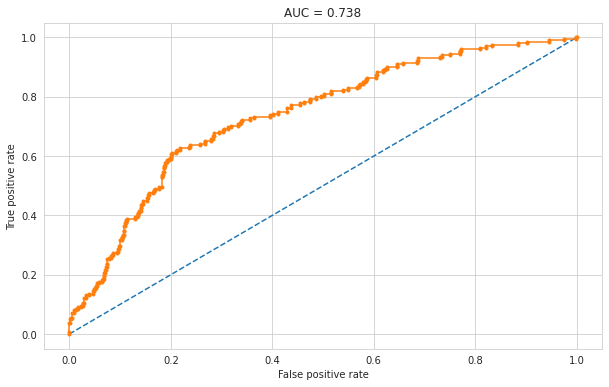

In [876]:
# ROC curve and AUC 
probs = grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [877]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

In [878]:
precision, recall, thresold =precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

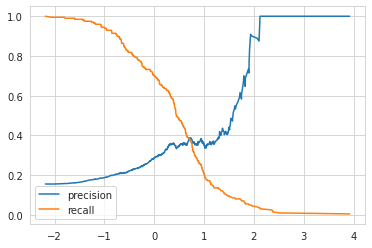

In [879]:
plt.plot(thresold, precision[:-1], label = 'precision')
plt.plot(thresold, recall[:-1], label = 'recall')
plt.legend()

In [880]:
def model_final(model, X, thresold=0) :
  return model.decision_function(X) > thresold

In [889]:
y_pred = model_final(grid.best_estimator_, X_test, thresold=0)

In [893]:
confusion_matrix(y_test, y_pred)

array([[730, 344],
       [ 59, 139]])

In [890]:
f1_score(y_test, y_pred)

0.40822320117474303

In [891]:
recall_score(y_test, y_pred) 

0.702020202020202

In [892]:
precision_score(y_test, y_pred) 

0.28778467908902694